In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# Step 1: Load dataset and fit SVM model
X, y = make_blobs(n_samples=200, centers=2, random_state=3)
C=0.01
clf = SVC(C=C,kernel='linear')
clf.fit(X, y)

SVC(C=0.01, kernel='linear')

In [ ]:
y_pred=clf.predict(X)
sum(y_pred==y)/len(y)

1.0

In [ ]:
clf.score(X,y)

1.0

In [ ]:
support_vectors=clf.support_vectors_
support_vectors


array([[ 0.4705981 ,  2.61647914],
       [ 0.65968729,  2.41981542],
       [-1.0144355 ,  3.20218134],
       [-0.22816528,  3.53653954],
       [-1.8997797 ,  3.19111595],
       [ 0.41307295,  2.24848441],
       [ 0.26262326,  2.4188462 ],
       [ 0.42745643,  2.61640063],
       [-0.00782709,  3.44996325],
       [ 0.49069341,  2.48732182],
       [-0.21967857,  4.02217001],
       [-1.23229972,  3.89519459],
       [-0.16908848,  3.95730655],
       [ 0.21219196,  1.74387328],
       [ 0.09216603,  3.13908069],
       [-2.16225458,  0.54281438],
       [-3.11468967,  0.85797276],
       [-3.07798356,  2.0983071 ],
       [-3.32794185,  1.80341865],
       [-1.37002685,  0.46854723],
       [-3.41294006,  1.58279495],
       [-2.13557245,  0.88353995],
       [-3.32054761,  1.13556023],
       [-2.34275333,  2.5324107 ],
       [-3.58831711,  2.28743063],
       [-3.8942215 ,  2.18302673],
       [-2.67864327,  1.12487082],
       [-2.56266674,  0.72964511],
       [-3.08725214,

In [ ]:
# Step 2: Get the SVM coefficients and intercept
w = clf.coef_[0]
b = clf.intercept_
print("w:", w)
print("b:", b)

w: [-0.39803005 -0.25014163]
b: [-0.05201428]


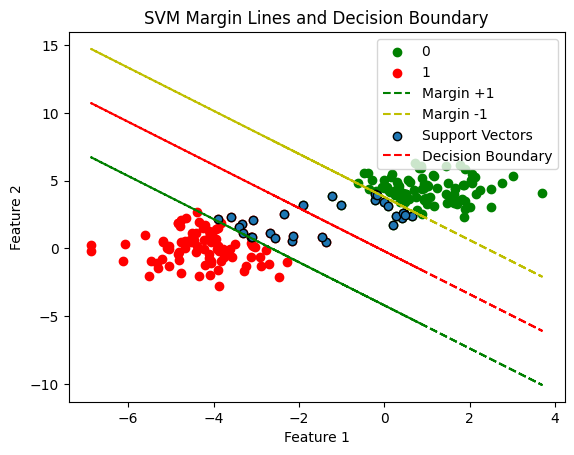

In [ ]:
# Step 3: Plot the margin lines
# We want to find the x-values where the margin lines intersect the y-axis
# The upper margin line is: w1*x1 + w2*x2 + b = +1
# The margin lines are: w1*x1 + w2*x2 + b =  -1

# For simplicity, solve for x2 (y-axis intercept) from the margin equation
# x2 = -(w1 * x1 + b-1) / w2 for positive margin line
# x2 = -(w1 * x1 + b+1) / w2  for negative margin line

margin_positive = -(w[0] * X[:, 0] + b - 1) / w[1]
margin_negative = -(w[0] * X[:, 0] + b + 1) / w[1]

# Step 4: Plotting
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
plt.scatter(X[:,0][y==0], X[:,1][y==0], label="0",  c='green')
plt.scatter(X[:,0][y==1], X[:,1][y==1], label="1",  c='red')
plt.plot(X[:, 0], margin_positive, 'g--', label='Margin +1')  # positive margin line
plt.plot(X[:, 0], margin_negative, 'y--', label='Margin -1')  # negative margin line
plt.scatter(support_vectors[:, 0],support_vectors[:, 1],edgecolors='k',   label='Support Vectors')

plt.plot(X[:, 0], -(w[0] * X[:, 0] + b) / w[1], 'r--' ,label='Decision Boundary')  # Hyperplane
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Margin Lines and Decision Boundary')
plt.show()


(-4.0, 8.0)

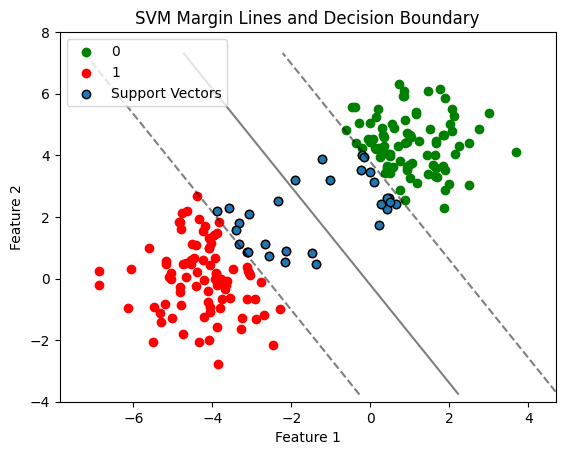

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(clf,X,plot_method="contour",colors="k",
    levels=[-1, 0, 1],alpha=0.5,linestyles=["--", "-", "--"])
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
plt.scatter(X[:,0][y==0], X[:,1][y==0], label="0",  c='green')
plt.scatter(X[:,0][y==1], X[:,1][y==1], label="1",  c='red')

plt.scatter(support_vectors[:, 0],support_vectors[:, 1],edgecolors='k',   label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Margin Lines and Decision Boundary')
plt.ylim(-4,8)